In [ ]:
n = int(input())
result =[]
for _ in range(n):
    num = int(input())
    result.append(num)
result.sort()
    

# 클래스

In [ ]:
import torch
import torchvision
from torchvisioSn import tv_tensors
from tqdm.auto import tqdm
from warnings import filterwarnings
from matplotlib import font_manager, rc
from torchvision.utils import draw_bounding_boxes
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
filterwarnings('ignore')
font_path = "c:\WINDOWS\Fonts\GULIM.TTC"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
plt.rc('font', size=12) 

In [33]:
classes=['c_1','c_2_01','c_2_02','c_3',
         'c_4_01_02','c_4_02_01_02',
         'c_4_02_02_02','c_4_02_03_02','c_4_03','c_5_02',
         'c_6','c_7','c_1_01','c_2_02_01',
         'c_3_01','c_4_03_01','c_5_01_01',
         'c_5_02_01','c_6_01','c_7_01',
         'c_4_01_01','c_4_02_01_01',
         'c_4_02_02_01','c_4_02_03_01',
         'c_5_01','c_8_01','c_8_02',
         'c_8_01_01','c_9']
len(classes)

29

# CustomDataset 구성하기

annopath, image_path, annofile, imagefile

## CUSTOM Transform

## v2.transforms

In [34]:
from torchvision.transforms import v2
train_transforms = v2.Compose([
    v2.RandomHorizontalFlip(p=0.5),
    v2.Resize((224,224)),
    v2.RandomVerticalFlip(0.5),
    v2.ToTensor()
])

test_transform = v2.Compose([
    v2.Resize((224,224)),
    v2.ToTensor()
])

In [35]:
from torch.utils.data import Dataset
from torchvision.io import read_image
from pathlib import Path
from torchvision.utils import draw_bounding_boxes
from json import load
import torch
import matplotlib.pyplot as plt

# TrashDataset에서 불러와야할 것들
'''전처리한 화상의 텐서 형식 데이터와 어노테이션 획득'''
'''전터리한 화상의 텐서 형식 데이터, 어노테이션, 화상의 높이, 폭 취득'''
anno_path = Path(r'C:\Users\hyssk\Myopencv\DeepLearningVision\CustomDataset\Data\02.라벨링데이터\\')
img_dir = Path(r'C:\Users\hyssk\Myopencv\DeepLearningVision\CustomDataset\Data\01.원천데이터\\')

# Trash Dataset에서 뭘 뽑아내야할까
# Image의 [3 channels, width, height] 에 대한 정보, 해당 이미지의 Annotation 정보 (class 정보, BBOX)
class TrashDataset(Dataset):
    def __init__(self, classes, anno_path, img_dir, transform = None):
        self.anno_list = sorted(list(anno_path.glob('*/*/*.json'))) # annotation 파일들 모으고 sorted로 정렬
        self.img_list = sorted(list(img_dir.glob('*/*/*.jpg'))) # image 파일들을 모으고 sorted로 정렬
        self.transform= transform
        self.classes = classes

    def __getitem__(self, idx):
        # img 읽어오기
        img = read_image(str(self.img_list[idx]))

        # img와 맞는 annotation_path
        annotation_path = self.anno_list[idx]

        #  ret : [[xmin,ymin,xmax,ymax,label_ind],...]
        ret=[]
        with open(annotation_path, 'r') as f:
            data = load(f)
            for object in data['objects']:
                bndbox=[]
                for coord in object["annotation"]['coord']: # [X,Y,Width,Height] -> [X,Y,Xmax,Ymax] 변환
                    if coord == 'x':
                        bndbox.append(int(object['annotation']['coord'][coord])) # / float(data['Info']['RESOLUTION'].split('/')[0]))
                    elif coord =='y':
                        bndbox.append(int(object['annotation']['coord'][coord])) # / float(data['Info']['RESOLUTION'].split('/')[1]))
                    elif coord == 'width':
                        bndbox.append(int(object['annotation']['coord']['x'] + object['annotation']['coord'][coord])) # / float(data['Info']['RESOLUTION'].split('/')[0]))
                    elif coord == 'height':
                        bndbox.append(int(object['annotation']['coord']['y'] + object['annotation']['coord'][coord])) # / float(data['Info']['RESOLUTION'].split('/')[1]))
                bndbox.append(classes.index(object['class_name']))
        # [3 channels, width, height], [[Xmin,Ymin,Xmax,Ymax,label_idx],....] // shape [N,5]
                width,height = data['Info']['RESOLUTION'].split('/')
                ret.append(bndbox)
        coord = [row[:-1] for row in ret]
        boxes = tv_tensors.BoundingBoxes(coord,format="XYXY",canvas_size=(int(height),int(width)))
        transformed_img, transformed_boxes = self.transform(torch.tensor(img),boxes)
        class_idx = [row[-1] for row in ret]
        return transformed_img, transformed_boxes, class_idx
    def __len__(self):
        return len(self.anno_list)


dataset = TrashDataset(classes,anno_path,img_dir,train_transforms)
img, boxes, class_idx = dataset[1]
dataset[1]

(tensor([[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],
 
         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],
 
         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8),
 BoundingBoxes([[149, 116, 183, 224],
                [126, 196, 149, 224],
                [119, 112, 155, 212],
                [ 63, 167, 113, 224],
                [ 86, 123, 108, 171],
                [ 44, 137,  71, 174],
                [ 75,  75, 110, 131],
             

# Dataset[idx] 시각화해보기

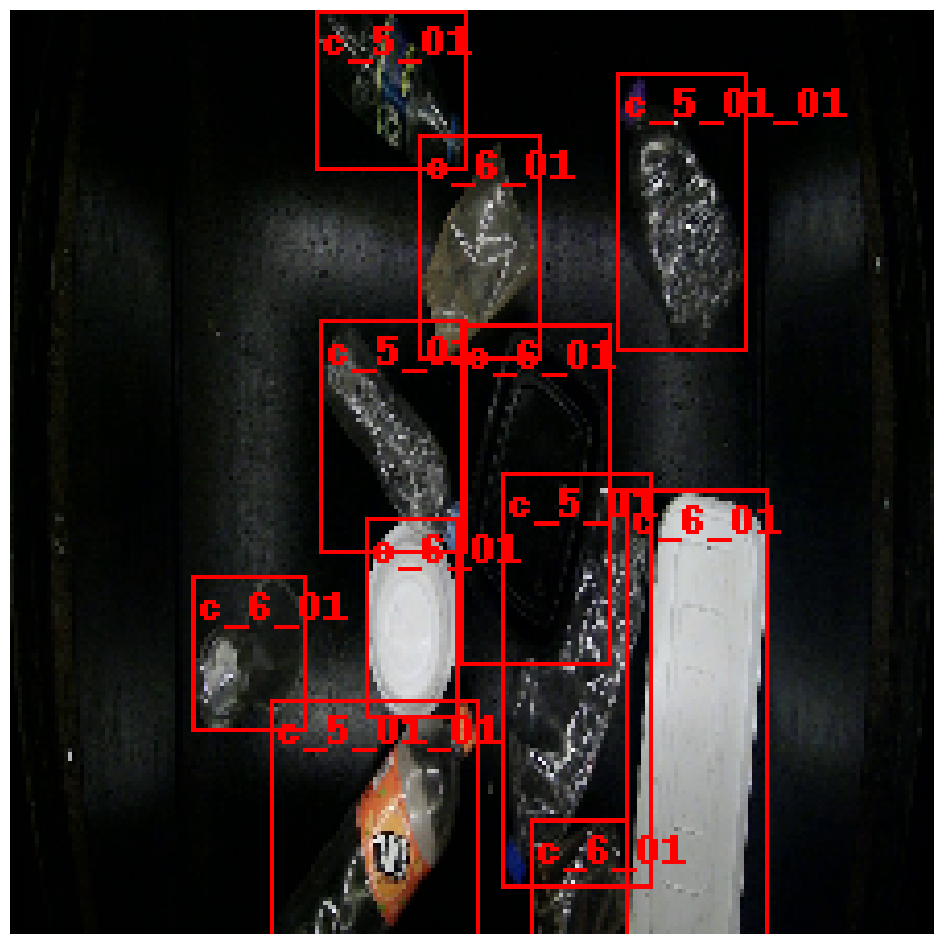

BoundingBoxes([[149, 116, 183, 224],
               [126, 196, 149, 224],
               [119, 112, 155, 212],
               [ 63, 167, 113, 224],
               [ 86, 123, 108, 171],
               [ 44, 137,  71, 174],
               [ 75,  75, 110, 131],
               [109,  76, 145, 158],
               [147,  15, 178,  82],
               [ 99,  30, 128,  84],
               [ 74,   0, 110,  38]], format=BoundingBoxFormat.XYXY, canvas_size=(224, 224))

In [36]:
drawn_box = draw_bounding_boxes(img, boxes, labels=[classes[i] for i in class_idx], colors=(255,0,0))
plt.figure(figsize=(12,12))
plt.imshow(drawn_box.permute(1,2,0))
plt.axis(False)
plt.show()
boxes

# 데이터 로더 (Batch_size)

나의 데이터셋은 length가 다양하므로 dataloader시 batch로 묶어줄때 오류가 난다. 그래서 Collate_fn이 필요

In [37]:
def od_collate_fn(batch):
    '''
    Dataset에서 꺼내는 어노테이션 데이터의 크기는 화상마다 다름.
    화상 내의 물체 수가 두개이면 (2,5) 사이즈 [xmin, ymin, xmax, ymax, label]이 2개, 
    물체 수가 3개 이면 (3,5) 사이즈 [Xmin, Xmax, ymin, ymax, label]가 3개
    변화에 대응하는 DataLoader를 만드는 collate_fn을 작성
    collate_fn은 파이토치 리스트로 mini_batch를 작성하는 함수이다.
    '''
    targets=[]
    images=[]
    # batch = transformed_image, bbox , label
    for transformed_image, bbox, label in batch:
        images.append(transformed_image/255)
        targets.append({'boxes':torch.tensor(bbox), 'labels':torch.tensor(label)})
    
    return images,targets

In [38]:
from torch.utils.data import DataLoader
BATCH_SIZE = 2
dataloader = DataLoader(dataset,BATCH_SIZE,True,collate_fn=od_collate_fn)
dataloader_images, dataloader_targets = next(iter(dataloader))
print(f'dataloader_targets: {dataloader_targets}\n')
print(f'dataloader_images: {dataloader_images}')

dataloader_targets: [{'boxes': tensor([[137,   0, 179, 103],
        [100,  16, 131,  90],
        [ 93,  33, 108,  68],
        [118, 104, 142, 156],
        [ 84,   0, 106,  32],
        [ 33,   0,  74,  41],
        [ 45,  23, 103, 134],
        [ 27,  48,  53,  92],
        [ 71,  99,  91, 189],
        [ 45, 128,  77, 174],
        [ 28, 166,  59, 224],
        [ 76, 211,  87, 224],
        [ 90, 180, 134, 224],
        [133, 189, 156, 224]]), 'labels': tensor([24, 18, 10, 18,  9, 10, 10, 18, 24, 10, 18, 18, 10, 17])}, {'boxes': tensor([[101,  64, 159, 122],
        [ 47,  35, 105,  96],
        [ 48, 104, 102, 179]]), 'labels': tensor([11, 10, 25])}]

dataloader_images: [tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0

지금현재 데이터 파이프라인 

---

Trash Dataset (Annotation은 Trash image 내의 객체들의 bbox 정보와 label 정보를 parsing 완료)

2023/12/30 ~ 2023/12/31

Trash Datset class 내부에서 전처리작업을 진행하였다.

DataAugumentation 데이터 증강을 위해서 Compose 함수로 Sample 데이터셋이 잘 돌아가는지 확인

BBOX도 이미지 변환에 맞게 변경되는 모습을 보여준다.

문제없이 이미지 데이터 경로, 어노테이션 경로에 있는 모든 파일들을 끌어왔고,

이미지 데이터에 맞는 어노테이션을 할당하기 위해서 sorted한 후 어떻게 iter next 결과가 나오는지 print()로 확인하고

transform.Compose로 변환을 거친 image와 bbox를 출력해서 이상 없는지 체크하였다.

결과는 이상 무

---

2023/12/31 ~ 2024/01/01

이제 낱개로 존재하는 데이터셋을 묶음으로써 모델에 입력해야하는 Data PipeLine을 구축해야한다.

DataLoader가 그 역할을 해줄 것이다.

Batch_size는 2

문제점은 이미지들 마다 bbox의 개수가 다르기 때문에, Various Length가 존재하기 때문에, 

collate_fn 을 구현해야한다.

하지만, Resource 자료가 많지 않아서 하루 종일 코딩 진행 해보았지만, 쉽지 않다.

만들긴 했지만, model에 잘 입력될 지는 미지수인 상황

return 값은 (변환된 이미지 [2,3,224,224], 변환된 바운딩박스 [2,N,4], 라벨링 (2개))

---

이제는 Model, Loss Function, Optimizer 설정해야한다.

Loss Funtcion은 어떻게 해야할지 찾아봐야겠다.



# DataLoader에서 나오는 출력값 확인

In [39]:
print(f'dataloader_targets : {dataloader_targets}\n') # shape [{'boxes' : [[boundingboxes],...], 'labels': tensor([...]) ] 
print(f'dataloader_images : {dataloader_images}') # shape [(3,224,224), (3,224,224)]

dataloader_targets : [{'boxes': tensor([[137,   0, 179, 103],
        [100,  16, 131,  90],
        [ 93,  33, 108,  68],
        [118, 104, 142, 156],
        [ 84,   0, 106,  32],
        [ 33,   0,  74,  41],
        [ 45,  23, 103, 134],
        [ 27,  48,  53,  92],
        [ 71,  99,  91, 189],
        [ 45, 128,  77, 174],
        [ 28, 166,  59, 224],
        [ 76, 211,  87, 224],
        [ 90, 180, 134, 224],
        [133, 189, 156, 224]]), 'labels': tensor([24, 18, 10, 18,  9, 10, 10, 18, 24, 10, 18, 18, 10, 17])}, {'boxes': tensor([[101,  64, 159, 122],
        [ 47,  35, 105,  96],
        [ 48, 104, 102, 179]]), 'labels': tensor([11, 10, 25])}]

dataloader_images : [tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         

In [40]:
for batch in range(BATCH_SIZE):
    plt.figure()
    plt.imshow(draw_bounding_boxes(dataloader_images[batch],
                                   boxes=dataloader_targets[batch]['boxes'],
                                   colors=(255,0,0),
                                   labels=list(classes[i.item()] for i in dataloader_targets[batch]['labels'])
                                   ).permute(1,2,0)
                 )
    plt.axis(False)
    plt.title("Dataloader에서 추출된 Images")
    plt.show()

ValueError: Tensor uint8 expected, got torch.float32

<Figure size 640x480 with 0 Axes>

# Customizing my Model 커스터마이징 모델

In [41]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

model1 = fasterrcnn_resnet50_fpn(pretrained = True)
num_classes = len(classes)+1
print(num_classes)
in_feature = model1.roi_heads.box_predictor.cls_score.in_features
model1.roi_heads.box_predictor = FastRCNNPredictor(in_feature , num_classes)

30


# Faster RCNN model input(target) 딕셔너리 내의 요소

During training, the model expects both the input tensors and a targets (list of dictionary), containing:

boxes (FloatTensor[N, 4]): the ground-truth boxes in [x1, y1, x2, y2] format, with 0 <= x1 < x2 <= W and 0 <= y1 < y2 <= H.
labels (Int64Tensor[N]): the class label for each ground-truth box

## 기본 샘플 Example 사용법

In [42]:
model = fasterrcnn_resnet50_fpn(pretrained=True)
images, boxes = torch.rand(4, 3, 600, 1200), torch.rand(4, 11, 4)
boxes[:, :, 2:4] = boxes[:, :, 0:2] + boxes[:, :, 2:4]
labels = torch.randint(1, 91, (4, 11))
images = list(image for image in images)
targets = []
for i in range(len(images)):
     d = {}
     d['boxes'] = boxes[i]
     d['labels'] = labels[i]
     targets.append(d)
output = model(images, targets)

# For inference
model.eval()


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [43]:
optimizer=torch.optim.Adam(model1.parameters(),lr=0.001)
for epochs in tqdm(range(10)):
    epoch_loss = 0 
    for batch, target in dataloader:
        loss_dict = model1(batch,target)
        loss = sum(v for v in loss_dict.values())
        epoch_loss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(epoch_loss)

 10%|█         | 1/10 [05:50<52:34, 350.51s/it]

tensor(95.3226, grad_fn=<AddBackward0>)


 20%|██        | 2/10 [11:50<47:26, 355.87s/it]

tensor(28.4999, grad_fn=<AddBackward0>)


 30%|███       | 3/10 [17:27<40:31, 347.32s/it]

tensor(32.5590, grad_fn=<AddBackward0>)


 40%|████      | 4/10 [22:57<34:03, 340.67s/it]

tensor(35.5257, grad_fn=<AddBackward0>)


 50%|█████     | 5/10 [28:28<28:05, 337.16s/it]

tensor(35.0155, grad_fn=<AddBackward0>)


 60%|██████    | 6/10 [34:01<22:22, 335.70s/it]

tensor(36.0407, grad_fn=<AddBackward0>)


 70%|███████   | 7/10 [39:46<16:55, 338.62s/it]

tensor(34.7929, grad_fn=<AddBackward0>)


 80%|████████  | 8/10 [45:30<11:21, 340.55s/it]

tensor(35.4673, grad_fn=<AddBackward0>)


 90%|█████████ | 9/10 [51:16<05:42, 342.02s/it]

tensor(33.2871, grad_fn=<AddBackward0>)


100%|██████████| 10/10 [57:00<00:00, 342.08s/it]

tensor(33.5997, grad_fn=<AddBackward0>)


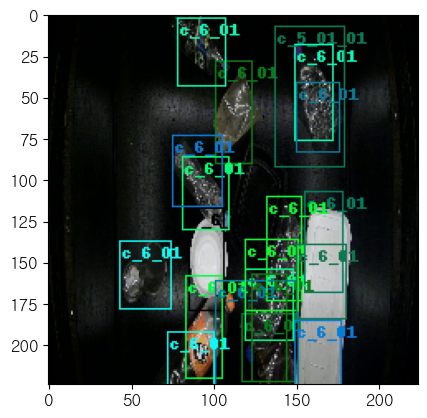

In [72]:
from torchvision.ops import nms
model1.eval()
test_image = read_image(r'C:\Users\hyssk\Myopencv\DeepLearningVision\CustomDataset\Data\01.원천데이터\1.재활용선별장\1.A1\A1C_20220818_000016.jpg')
transformed_test_image = test_transform(test_image)
adjusted_image = transformed_test_image/255 
with torch.inference_mode():
    test = (model1(adjusted_image.unsqueeze(0)))

labels = [classes[i] for i in test[0]['labels']] # label encoding -> Class names
testing_pic=draw_bounding_boxes(transformed_test_image, test[0]['boxes'][:20], labels[:20])

plt.figure()
plt.imshow(testing_pic.permute(1,2,0))
plt.show()

# Get boundary rounder and rounder

# 성능평가